# Nhận diện chó mèo
Có tham khảo code ở https://www.kaggle.com/ayushish12/cnn-dogs-vs-cats/notebook

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

## Tiền xử lý dữ liệu

In [2]:
# Load ảnh, chia loại, định lại cỡ ảnh, rescale ảnh
train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True
                                  )
training_set = train_datagen.flow_from_directory('../Data/Cat and Dog/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [3]:
# Load ảnh, chia loại, định lại cỡ ảnh, rescale ảnh
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../Data/Cat and Dog/test_set', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = 'binary',
                                            shuffle = False,
                                           )

Found 2023 images belonging to 2 classes.


In [4]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

## Tạo model CNN

In [5]:
# Tạo model
model = Sequential()

In [6]:
# Thêm các layer
model.add(Conv2D(32, kernel_size = 3, 
                 activation='relu', 
                 input_shape=(64, 64, 3), 
                 padding='same'))
model.add(MaxPool2D(pool_size=2, strides = 2))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size=2, strides = 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

**Training**

In [7]:
# Thiết lập thông số
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Huấn luyện
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
 26/251 [==>...........................] - ETA: 3:15 - loss: 0.7054 - accuracy: 0.4976

In [10]:
model.evaluate(test_set)

64/64 [==============================] - 10s 163ms/step - loss: 1.9037 - accuracy: 0.7509


[1.903677225112915, 0.7508650422096252]

### Kiểm thử

In [11]:
y_pred = model.predict_generator(test_set)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[9.9952352e-01],
       [9.9836916e-01],
       [4.2883084e-07],
       ...,
       [2.3950171e-05],
       [2.3253484e-08],
       [9.9628109e-01]], dtype=float32)

In [12]:
y_pred_class = y_pred > 0.5
y_pred_class

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [13]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1011
           1       0.76      0.74      0.75      1012

    accuracy                           0.75      2023
   macro avg       0.75      0.75      0.75      2023
weighted avg       0.75      0.75      0.75      2023



## Dự đoán một số ảnh

Cat


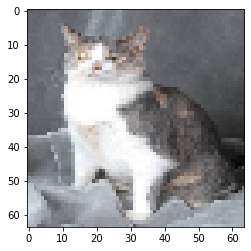

In [19]:
from keras.preprocessing import image
test_image = image.load_img('../Data/Cat and Dog/test_set/cats/cat.4041.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print('Cat' if (result == False) else 'Dog')

Dog


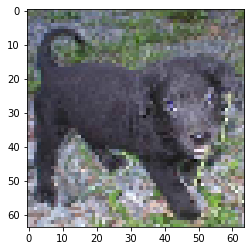

In [23]:
from keras.preprocessing import image
test_image = image.load_img('../Data/Cat and Dog/test_set/dogs/dog.4052.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print('Cat' if result == False else 'Dog')